# Assignment 1 
## MIE 1624 :Introduction to Data Science and Analytics

This assignment aims to deeply understand and explore the skills and credentials in the data science community based on the survey conducted by Kaggle in 2018. In this analysis, the surveys responses will be used to train, validate, and tune multiple regressors to predict a respondent's current annual compensation.

The analysis is divided into the following parts: **data cleaning**, **exploratory analysis**, **feature selection(or model preparation)**, **model implementation**, **model validation**, **model tuning**, and **discussion**. As much as possible, it was ascertained that the report explained the purpose of each step, their importance, and the pros and cons of that approach.

Functions such as pandas, numpy, matplotlib, and sklearn were uploaded to perform the analysis on the succeeding parts.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

# Sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
#from sklearn.neural_network import MLPRegressor

# Kaggle Data Science Community Survey

In [2]:
kaggle_survey=pd.read_csv(r'kaggle_salary.csv') # Uploads the contents of the kaggle survey.
kaggle_survey.head() # Presents the first five rows of the kaggle survey.

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,3,9,11,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,NaN
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0


Index 0 was observed to contain the specific questions to each respondent. This was dropped so that the entire dataframe contains only survey responses.

In [3]:
kaggle_survey=kaggle_survey.drop(kaggle_survey.index[0]) # Drops the first row of the kaggle_survey dataframe.
kaggle_survey=kaggle_survey.reset_index() # Resets the index of the observations.
kaggle_survey.head() # Presents the first five rows of the kaggle survey.

,level_0,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
1,2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
2,3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
3,4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0
4,5,8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,...,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,4.0


# Part 1: Data Cleaning

While the data is made ready for analysis, several values are missing, and some features are categorical. Note that some values that appear “null” indicate that a survey respondent did not select that given option from a multiple-choice list. For example – “Which of the following hosted notebooks have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - JupyterHub/Binder”.

For the data cleaning step, handle missing values however you see fit and justify your approach. Provide some insight on why you think the values are missing and how your approach might impact the overall analysis. Suggestions include filling the missing values with a certain value (e.g. mode for categorical data) and completely removing the features with missing values. Secondly, convert categorical data into numerical data by encoding and explain why you used this particular encoding method.

## Pre-Selection of Survey Responses for Analysis

Many columns were dropped because they won't be useful for the analysis of salary prediction. The reasons for dropping these columns include:

- The question asked for a respondent's opinion about data science, which does not relate to his skill and credentials. These questions are subjective and won't relate to predicting a person's salary.
- For questions with **checkbox answers** such as "What is your gender?", an additional column consisting of other possible answer was removed. Likewise, those columns pertaining to the answer "None" were removed as these won't be relevant for the regression analysis.

## Dropping columns that are not preselected for analysis

Dropping of columns is only a preliminary filtering of features to be used in the regression analysis. This removes the columns described above. It does not mean, however, that all the columns maintained will be used for the regression analysis. They will still be analyzed further in the feature selection part.

*A separate initial review of of all the questions were performed in jupyter notebook to select the questions to be included. However, this wasn't shown as it will result into a long list of commands showing the contents of each column.*

In [4]:
# Drops the columns that won't be of relevance to regression analysis.
columns_to_drop=['Unnamed: 0','Time from Start to Finish (seconds)','Q1_OTHER_TEXT','Q6_OTHER_TEXT','Q7_OTHER_TEXT','Q10','Q11_Part_6','Q11_Part_7','Q11_OTHER_TEXT','Q12_Part_1_TEXT','Q12_Part_2_TEXT','Q12_Part_3_TEXT','Q12_Part_4_TEXT','Q12_Part_5_TEXT','Q12_OTHER_TEXT','Q13_Part_14','Q13_Part_15','Q13_OTHER_TEXT','Q14_Part_10','Q14_Part_11','Q14_OTHER_TEXT','Q15_Part_6','Q15_Part_7','Q15_OTHER_TEXT','Q16_Part_17','Q16_Part_18','Q16_OTHER_TEXT','Q17','Q17_OTHER_TEXT','Q18','Q18_OTHER_TEXT','Q19_Part_18','Q19_Part_19','Q19_OTHER_TEXT','Q20','Q20_OTHER_TEXT','Q21_Part_12','Q21_Part_13','Q21_OTHER_TEXT','Q22','Q22_OTHER_TEXT','Q26','Q27_Part_19','Q27_Part_20','Q27_OTHER_TEXT','Q28_Part_42','Q28_Part_43','Q28_OTHER_TEXT','Q29_Part_27','Q29_Part_28','Q29_OTHER_TEXT','Q30_Part_24','Q30_Part_25','Q30_OTHER_TEXT','Q31_Part_12','Q31_OTHER_TEXT','Q32','Q32_OTHER','Q33_Part_10','Q33_Part_11','Q33_OTHER_TEXT','Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6','Q34_OTHER_TEXT','Q35_Part_1','Q35_Part_2','Q35_Part_3','Q35_Part_4','Q35_Part_5','Q35_Part_6','Q35_OTHER_TEXT','Q36_Part_12','Q36_Part_13','Q36_OTHER_TEXT','Q37','Q37_OTHER_TEXT','Q38_Part_21','Q38_Part_22','Q38_OTHER_TEXT','Q39_Part_1','Q39_Part_2','Q40','Q41_Part_1','Q41_Part_2','Q41_Part_3','Q42_Part_1','Q42_Part_2','Q42_Part_3','Q42_Part_4','Q42_Part_5','Q42_OTHER_TEXT','Q43','Q44_Part_1','Q44_Part_2','Q44_Part_3','Q44_Part_4','Q44_Part_5','Q44_Part_6','Q45_Part_1','Q45_Part_2','Q45_Part_3','Q45_Part_4','Q45_Part_5','Q45_Part_6','Q46','Q47_Part_1','Q47_Part_2','Q47_Part_3','Q47_Part_4','Q47_Part_5','Q47_Part_6','Q47_Part_7','Q47_Part_8','Q47_Part_9','Q47_Part_10','Q47_Part_11','Q47_Part_12','Q47_Part_13','Q47_Part_14','Q47_Part_15','Q47_Part_16','Q48','Q49_Part_1','Q49_Part_2','Q49_Part_3','Q49_Part_4','Q49_Part_5','Q49_Part_6','Q49_Part_7','Q49_Part_8','Q49_Part_9','Q49_Part_10','Q49_Part_11','Q49_Part_12','Q49_OTHER_TEXT','Q50_Part_1','Q50_Part_2','Q50_Part_3','Q50_Part_4','Q50_Part_5','Q50_Part_6','Q50_Part_7','Q50_Part_8','Q50_OTHER_TEXT']
kaggle_survey.drop(labels=columns_to_drop, axis=1, inplace=True)

## Classification of Survey Questions into two categories

The questions type in the survey were observed to be answered with the use of either a **dropdown** menu or a **checkbox**. The type of data treatment for these two types of questions will be different. Further discussion below is shown.

**Dropdown.** Some questions in the survey are dropdown menus wherein only one answer can be selected. This results only into a single column showing the answers given by the respondents. The questions classified into this type are shown below. 

- Q1 - What is your gender?
- Q2 - What is your age (# years)?
- Q3 - In which country do you currently reside?
- Q4 - What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
- Q5 - Which best describes your undergraduate major?
- Q6 - Select the title most similar to your current role (or most recent title if retired).
- Q7 - In what industry is your current employer/contract (or your most recent employer if retired)?
- Q8 - How many years of experience do you have in your current role?
- Q9 - What is your current yearly compensation (approximate USD)?
- Q12 - What is the primary tool that you use at work or school to analyze data?
- Q23 - Approximately what percent of your time at work or school is spent actively coding?
- Q24 - How long have you been writing code to analyze data?
- Q25 - For how many years have you used machine learning methods (at work or in school)?

**Checkbox.** Some questions are checkboxes in which multiple answers can be given by a respondent. Multiple columns (answers) exist in a question containing whether a respondent marked that specific answer or not. If the persosn didn't mark a checkbox, it will appear as blank in the column. Otherwise, the checkbox selected will appear. These columns only contain a blank answer or the categorical answer for the question. The questions classified into this type are listed as follows. 

- Q11 - Select any activities that make up an important part of your role at work.
- Q13 - Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? 
- Q14 - Which of the following hosted notebooks have you used at work or school in the last 5 years?
- Q15 - Which of the following cloud computing services have you used at work or school in the last 5 years?
- Q16 - What programming languages do you use on a regular basis?
- Q19 - What machine learning frameworks have you used in the past 5 years?
- Q21 - What data visualization libraries or tools have you used in the past 5 years?
- Q27 - Which of the following cloud computing products have you used at work or school in the last 5 years (Select all that apply)?
- Q28 - Which of the following machine learning products have you used at work or school in the last 5 years?
- Q29 - Which of the following relational database products have you used at work or school in the last 5 years?
- Q30 - Which of the following big data and analytics products have you used at work or school in the last 5 years? 
- Q31 - Which types of data do you currently interact with most often at work or school? 
- Q33 - Where do you find public datasets? 
- Q36 - On which online platforms have you begun or completed data science courses?
- Q38 - Who/what are your favorite media sources that report on data science topics?


These two classifications were saved into two different dataframes for separate and for effective data cleaning.

## Analysis of Dropdown Questions

For the first case of survey questions, the data could have been missing due to any of the following reasons.

- Survey respondent left the question missing for privacy purpose;
- Survey respondent may have not understood the question; or
- Data not stored appropriately in the system 

These missing data should not be left blank as they may result into any of the following.

- Introduce a bias in the estimation of variable;
- Reduce the representativeness of the sample;
- Affect the  prediction model; and 
- Ultimately result in wrong decision making

In order to prevent the potential outcomes above, each column has to be investigated to 
1. Determine the percentage of missing values over the total number of observations;
2. Imputate the missing values; and 
3. Convert categorical data into numerical data by encoding.

## Determination of the percentage of missing values

The percentage of missing values were determined. If the percentage is more than 30%, the entire column will be deleted to not affect the outcome of the model. *Please note that the 30% value was arbitrarily selected.*

In [5]:
#Segregating the questions as dropdown and checkbox questions
dropdown_questions=pd.DataFrame([kaggle_survey.Q1,kaggle_survey.Q2,kaggle_survey.Q3,kaggle_survey.Q4,kaggle_survey.Q5,kaggle_survey.Q6,kaggle_survey.Q7,kaggle_survey.Q8,kaggle_survey.Q12_MULTIPLE_CHOICE,kaggle_survey.Q23,kaggle_survey.Q24,kaggle_survey.Q25]).transpose()
checkbox_questions=pd.DataFrame([kaggle_survey.Q11_Part_1,kaggle_survey.Q11_Part_2,kaggle_survey.Q11_Part_3,kaggle_survey.Q11_Part_4,kaggle_survey.Q11_Part_5,kaggle_survey.Q13_Part_1,kaggle_survey.Q13_Part_2,kaggle_survey.Q13_Part_3,kaggle_survey.Q13_Part_4,kaggle_survey.Q13_Part_5,kaggle_survey.Q13_Part_6,kaggle_survey.Q13_Part_7,kaggle_survey.Q13_Part_8,kaggle_survey.Q13_Part_9,kaggle_survey.Q13_Part_10,kaggle_survey.Q13_Part_11,kaggle_survey.Q13_Part_12,kaggle_survey.Q13_Part_13,kaggle_survey.Q14_Part_1,kaggle_survey.Q14_Part_2,kaggle_survey.Q14_Part_3,kaggle_survey.Q14_Part_4,kaggle_survey.Q14_Part_5,kaggle_survey.Q14_Part_6,kaggle_survey.Q14_Part_7,kaggle_survey.Q14_Part_8,kaggle_survey.Q14_Part_9,kaggle_survey.Q15_Part_1, kaggle_survey.Q15_Part_2, kaggle_survey.Q15_Part_3, kaggle_survey.Q15_Part_4, kaggle_survey.Q15_Part_5, kaggle_survey.Q16_Part_1, kaggle_survey.Q16_Part_2, kaggle_survey.Q16_Part_3, kaggle_survey.Q16_Part_4, kaggle_survey.Q16_Part_5, kaggle_survey.Q16_Part_6, kaggle_survey.Q16_Part_7, kaggle_survey.Q16_Part_8, kaggle_survey.Q16_Part_9, kaggle_survey.Q16_Part_10, kaggle_survey.Q16_Part_11, kaggle_survey.Q16_Part_12, kaggle_survey.Q16_Part_13, kaggle_survey.Q16_Part_14, kaggle_survey.Q16_Part_15, kaggle_survey.Q16_Part_16, kaggle_survey.Q19_Part_1, kaggle_survey.Q19_Part_2, kaggle_survey.Q19_Part_3, kaggle_survey.Q19_Part_4, kaggle_survey.Q19_Part_5, kaggle_survey.Q19_Part_6, kaggle_survey.Q19_Part_7, kaggle_survey.Q19_Part_8, kaggle_survey.Q19_Part_9, kaggle_survey.Q19_Part_10, kaggle_survey.Q19_Part_11, kaggle_survey.Q19_Part_12, kaggle_survey.Q19_Part_13, kaggle_survey.Q19_Part_14, kaggle_survey.Q19_Part_15, kaggle_survey.Q19_Part_16, kaggle_survey.Q19_Part_17, kaggle_survey.Q21_Part_1, kaggle_survey.Q21_Part_2, kaggle_survey.Q21_Part_3, kaggle_survey.Q21_Part_4, kaggle_survey.Q21_Part_5, kaggle_survey.Q21_Part_6, kaggle_survey.Q21_Part_7, kaggle_survey.Q21_Part_8, kaggle_survey.Q21_Part_9, kaggle_survey.Q21_Part_10, kaggle_survey.Q21_Part_11, kaggle_survey.Q27_Part_1, kaggle_survey.Q27_Part_2, kaggle_survey.Q27_Part_3, kaggle_survey.Q27_Part_4, kaggle_survey.Q27_Part_5, kaggle_survey.Q27_Part_6, kaggle_survey.Q27_Part_7, kaggle_survey.Q27_Part_8,kaggle_survey.Q27_Part_9, kaggle_survey.Q27_Part_10, kaggle_survey.Q27_Part_11, kaggle_survey.Q27_Part_12, kaggle_survey.Q27_Part_13, kaggle_survey.Q27_Part_14, kaggle_survey.Q27_Part_15, kaggle_survey.Q27_Part_16, kaggle_survey.Q27_Part_17, kaggle_survey.Q27_Part_18, kaggle_survey.Q28_Part_1, kaggle_survey.Q28_Part_2, kaggle_survey.Q28_Part_3, kaggle_survey.Q28_Part_4, kaggle_survey.Q28_Part_5, kaggle_survey.Q28_Part_6, kaggle_survey.Q28_Part_7, kaggle_survey.Q28_Part_8, kaggle_survey.Q28_Part_9, kaggle_survey.Q28_Part_10, kaggle_survey.Q28_Part_11, kaggle_survey.Q28_Part_12, kaggle_survey.Q28_Part_13, kaggle_survey.Q28_Part_14, kaggle_survey.Q28_Part_15, kaggle_survey.Q28_Part_16, kaggle_survey.Q28_Part_17, kaggle_survey.Q28_Part_18, kaggle_survey.Q28_Part_19, kaggle_survey.Q28_Part_20, kaggle_survey.Q28_Part_21, kaggle_survey.Q28_Part_22, kaggle_survey.Q28_Part_23, kaggle_survey.Q28_Part_24, kaggle_survey.Q28_Part_25, kaggle_survey.Q28_Part_26, kaggle_survey.Q28_Part_27, kaggle_survey.Q28_Part_28, kaggle_survey.Q28_Part_29, kaggle_survey.Q28_Part_30, kaggle_survey.Q28_Part_31, kaggle_survey.Q28_Part_32, kaggle_survey.Q28_Part_33, kaggle_survey.Q28_Part_34, kaggle_survey.Q28_Part_35, kaggle_survey.Q28_Part_36, kaggle_survey.Q28_Part_37, kaggle_survey.Q28_Part_38, kaggle_survey.Q28_Part_39, kaggle_survey.Q28_Part_40, kaggle_survey.Q28_Part_41, kaggle_survey.Q29_Part_1, kaggle_survey.Q29_Part_2, kaggle_survey.Q29_Part_3, kaggle_survey.Q29_Part_4, kaggle_survey.Q29_Part_5, kaggle_survey.Q29_Part_6, kaggle_survey.Q29_Part_7, kaggle_survey.Q29_Part_8, kaggle_survey.Q29_Part_9, kaggle_survey.Q29_Part_10, kaggle_survey.Q29_Part_11, kaggle_survey.Q29_Part_12, kaggle_survey.Q29_Part_13, kaggle_survey.Q29_Part_14, kaggle_survey.Q29_Part_15, kaggle_survey.Q29_Part_16, kaggle_survey.Q29_Part_17, kaggle_survey.Q29_Part_18, kaggle_survey.Q29_Part_19, kaggle_survey.Q29_Part_20, kaggle_survey.Q29_Part_21, kaggle_survey.Q29_Part_22, kaggle_survey.Q29_Part_23, kaggle_survey.Q29_Part_24, kaggle_survey.Q29_Part_25, kaggle_survey.Q29_Part_26, kaggle_survey.Q30_Part_1, kaggle_survey.Q30_Part_2, kaggle_survey.Q30_Part_3, kaggle_survey.Q30_Part_4, kaggle_survey.Q30_Part_5, kaggle_survey.Q30_Part_6, kaggle_survey.Q30_Part_7, kaggle_survey.Q30_Part_8, kaggle_survey.Q30_Part_9, kaggle_survey.Q30_Part_10, kaggle_survey.Q30_Part_11, kaggle_survey.Q30_Part_12, kaggle_survey.Q30_Part_13, kaggle_survey.Q30_Part_14, kaggle_survey.Q30_Part_15, kaggle_survey.Q30_Part_16, kaggle_survey.Q30_Part_17, kaggle_survey.Q30_Part_18, kaggle_survey.Q30_Part_19, kaggle_survey.Q30_Part_20, kaggle_survey.Q30_Part_21, kaggle_survey.Q30_Part_22,kaggle_survey.Q30_Part_23, kaggle_survey.Q31_Part_1, kaggle_survey.Q31_Part_2, kaggle_survey.Q31_Part_3, kaggle_survey.Q31_Part_4, kaggle_survey.Q31_Part_5, kaggle_survey.Q31_Part_6, kaggle_survey.Q31_Part_7, kaggle_survey.Q31_Part_8, kaggle_survey.Q31_Part_9, kaggle_survey.Q31_Part_10, kaggle_survey.Q31_Part_11, kaggle_survey.Q33_Part_1, kaggle_survey.Q33_Part_2, kaggle_survey.Q33_Part_3, kaggle_survey.Q33_Part_4, kaggle_survey.Q33_Part_5, kaggle_survey.Q33_Part_6, kaggle_survey.Q33_Part_7, kaggle_survey.Q33_Part_8, kaggle_survey.Q33_Part_9, kaggle_survey.Q36_Part_1, kaggle_survey.Q36_Part_2, kaggle_survey.Q36_Part_3, kaggle_survey.Q36_Part_4, kaggle_survey.Q36_Part_5, kaggle_survey.Q36_Part_6, kaggle_survey.Q36_Part_7, kaggle_survey.Q36_Part_8, kaggle_survey.Q36_Part_9, kaggle_survey.Q36_Part_10, kaggle_survey.Q36_Part_11, kaggle_survey.Q38_Part_1, kaggle_survey.Q38_Part_2, kaggle_survey.Q38_Part_3, kaggle_survey.Q38_Part_4, kaggle_survey.Q38_Part_5, kaggle_survey.Q38_Part_6, kaggle_survey.Q38_Part_7, kaggle_survey.Q38_Part_8, kaggle_survey.Q38_Part_9, kaggle_survey.Q38_Part_10, kaggle_survey.Q38_Part_11, kaggle_survey.Q38_Part_12, kaggle_survey.Q38_Part_13, kaggle_survey.Q38_Part_14, kaggle_survey.Q38_Part_15, kaggle_survey.Q38_Part_16, kaggle_survey.Q38_Part_17, kaggle_survey.Q38_Part_18, kaggle_survey.Q38_Part_19, kaggle_survey.Q38_Part_20]).transpose()

In [6]:
# Creates an array containing the question numbers of the drodown questions and zeros. The zeros will be replaced later by the missive values.
drop_down_missing=np.array([[1,0],[2,0],[3,0],[4,0],[5,0],[6,0],[7,0],[8,0],[9,0],[12,0],[23,0],[24,0],[25,0]])

# The process of determining the missing values for each question number.
drop_down_missing[0,1]=kaggle_survey.Q1.isnull().sum(axis = 0)/len(kaggle_survey)*100
drop_down_missing[1,1]=kaggle_survey.Q2.isnull().sum(axis = 0)/len(kaggle_survey)*100
drop_down_missing[2,1]=kaggle_survey.Q3.isnull().sum(axis = 0)/len(kaggle_survey)*100
drop_down_missing[3,1]=kaggle_survey.Q4.isnull().sum(axis = 0)/len(kaggle_survey)*100
drop_down_missing[4,1]=kaggle_survey.Q5.isnull().sum(axis = 0)/len(kaggle_survey)*100
drop_down_missing[5,1]=kaggle_survey.Q6.isnull().sum(axis = 0)/len(kaggle_survey)*100
drop_down_missing[6,1]=kaggle_survey.Q7.isnull().sum(axis = 0)/len(kaggle_survey)*100
drop_down_missing[7,1]=kaggle_survey.Q8.isnull().sum(axis = 0)/len(kaggle_survey)*100
drop_down_missing[9,1]=kaggle_survey.Q12_MULTIPLE_CHOICE.isnull().sum(axis = 0)/len(kaggle_survey)*100
drop_down_missing[10,1]=kaggle_survey.Q23.isnull().sum(axis = 0)/len(kaggle_survey)*100
drop_down_missing[11,1]=kaggle_survey.Q24.isnull().sum(axis = 0)/len(kaggle_survey)*100
drop_down_missing[12,1]=kaggle_survey.Q25.isnull().sum(axis = 0)/len(kaggle_survey)*100

# Creates a loop to print the percentage of missing values for each dropdown question.
for i in range(len(drop_down_missing)):
    print('Survey question %g has %.2f percent missing values over 15,429 observations' %(drop_down_missing[i,0], drop_down_missing[i,1]))

Survey question 1 has 0.00 percent missing values over 15,429 observations
Survey question 2 has 0.00 percent missing values over 15,429 observations
Survey question 3 has 0.00 percent missing values over 15,429 observations
Survey question 4 has 0.00 percent missing values over 15,429 observations
Survey question 5 has 0.00 percent missing values over 15,429 observations
Survey question 6 has 0.00 percent missing values over 15,429 observations
Survey question 7 has 0.00 percent missing values over 15,429 observations
Survey question 8 has 0.00 percent missing values over 15,429 observations
Survey question 9 has 0.00 percent missing values over 15,429 observations
Survey question 12 has 10.00 percent missing values over 15,429 observations
Survey question 23 has 12.00 percent missing values over 15,429 observations
Survey question 24 has 12.00 percent missing values over 15,429 observations
Survey question 25 has 13.00 percent missing values over 15,429 observations


Since the percentage of missing values that was calculated from above for questions 12, 23, 24, and 25 were only 10%, 12%, 12%, and 13%, respectively, the missing values will hence be imputated. 

## Imputation of categorical variables

A **random sample imputation** technique was referred to and used for this assignment. The other technique (**frequenct category imputation**) was not selected as it may result to over-representation of the most frequent survey response if there is a large number of missing values. 

The use of random sample imputation has the capability to preserve the frequency of different categories within each question. 

A function was created to fill in the missing data with random categories.

In [7]:
def impute_NaN_random(kaggle_survey, variable):    
    # A random sampling process first creates a new column.
    kaggle_survey[variable+'_rand']=kaggle_survey[variable]

    # The missing values (NaN) are dropped and then indicate the number of observations for the other categories. A pool of random samples are extracted and used to fill the missing values.
    kaggle_survey_rand=kaggle_survey[variable].dropna().sample(kaggle_survey[variable].isnull().sum(), random_state=0)
    
    # Indicates the index of observation of the missing values to be replaced by the random sample.
    kaggle_survey_rand.index=kaggle_survey[kaggle_survey[variable].isnull()].index
    
    # Replaces the missing values with randomly extracted categories.
    kaggle_survey.loc[kaggle_survey[variable].isnull(),variable]=kaggle_survey_rand

In [8]:
for variable in ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q12_MULTIPLE_CHOICE','Q23','Q24','Q25']:
    impute_NaN_random(dropdown_questions, variable)

In [9]:
dropdown_questions.isnull().sum()

Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8                             0
Q12_MULTIPLE_CHOICE            0
Q23                            0
Q24                            0
Q25                            0
Q1_rand                        0
Q2_rand                        0
Q3_rand                        0
Q4_rand                        0
Q5_rand                      135
Q6_rand                        0
Q7_rand                        0
Q8_rand                       76
Q12_MULTIPLE_CHOICE_rand    1572
Q23_rand                    1968
Q24_rand                    1988
Q25_rand                    2014
dtype: int64

In [10]:
columns_to_drop=['Q1_rand','Q2_rand','Q3_rand','Q4_rand','Q5_rand','Q6_rand','Q7_rand','Q8_rand','Q12_MULTIPLE_CHOICE_rand','Q23_rand','Q24_rand','Q25_rand']
dropdown_questions.drop(labels=columns_to_drop, axis=1, inplace=True)

#### Encoding categorical variables

The categorical variables have to be converted to numerical variables in order for the machine learning algorithm (i.e., regression) to support the analysis. Two encoding approaches mentioned below has been identified to help in solving this issue.

- **Label Encoding** converts each each category in a column to a number. For example, the Q1 column contains 2 values male and female, which can be encoded as 1 and 2, respectively.
- **One Hot Encoding** converts each category into a new column assigning 1 or 0 to the column.  

Whilst label encoding is a more straightforward approach, the values can be misinterpreted by the algorithm because the they are weighted. For example in Q1, a value of 2 is obviously greater than 1 but their numerical difference does not correspond realistically. Given this reason, this analysis uses **one hot encoding** to convert the categories into numerical values. 

In [11]:
# One hot encoding was performed using the get dummies function in pandas.
# A new dataframe was created containing the encoded values.
dropdown_questions_encoded=pd.get_dummies(dropdown_questions, columns=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q12_MULTIPLE_CHOICE','Q23','Q24','Q25'])
dropdown_questions_encoded.head()

,Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,...,Q25_1-2 years,Q25_10-15 years,Q25_2-3 years,Q25_20+ years,Q25_3-4 years,Q25_4-5 years,Q25_5-10 years,Q25_< 1 year,Q25_I have never studied machine learning and I do not plan to,Q25_I have never studied machine learning but plan to learn in the future
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Analysis of Check Box Questions

The second case of survey questions are all check boxes wherein more than one answers can be selected. These questions results in the kaggle survey form is a group of columns containing a single answer in each column. 

For example, Q13 has the question '*Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years?*'. The response in this question contains 13 columns representing each possible answer.

- Q13_Part_1 - Jupyter/IPython
- Q13_Part_2 - RStudio
- Q13_Part_3 - PyCharm
- Q13_Part_4 - Visual Studio Code
- Q13_Part_5 - nteract
- Q13_Part_6 - Atom
- Q13_Part_7 - MATLAB
- Q13_Part_8 - Visual Studio
- Q13_Part_9 - Notepad++
- Q13_Part_10 - Sublime Text
- Q13_Part_11 - Vim
- Q13_Part_12 - IntelliJ
- Q13_Part_13 - Spyder

Each column contains only the checked answer and NaN.**This result compilation is already similar to one hot encoded question.** To further clean these columns, the observations were replaced with 1 and NANs were replaced with 0. 

A function was created to perform these numerical value replacement.

In [12]:
def encode_numerical_values(kaggle_survey, variable):    
    # Replaces the values of NaN with 0 and all other categorical answers with 1.
    kaggle_survey[variable]=kaggle_survey[variable].apply(lambda x: 0 if pd.isnull(x) else 1 )

In [13]:
# A new dataframe was created containing the encoded values.
checkbox_questions_encoded=checkbox_questions

for variable in ['Q11_Part_1','Q11_Part_2','Q11_Part_3','Q11_Part_4','Q11_Part_5','Q13_Part_1','Q13_Part_2','Q13_Part_3','Q13_Part_4','Q13_Part_5','Q13_Part_6','Q13_Part_7','Q13_Part_8','Q13_Part_9','Q13_Part_10','Q13_Part_11','Q13_Part_12','Q13_Part_13','Q14_Part_1','Q14_Part_2','Q14_Part_3','Q14_Part_4','Q14_Part_5','Q14_Part_6','Q14_Part_7','Q14_Part_8','Q14_Part_9','Q15_Part_1','Q15_Part_2', 'Q15_Part_3', 'Q15_Part_4', 'Q15_Part_5', 'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13', 'Q16_Part_14', 'Q16_Part_15', 'Q16_Part_16', 'Q19_Part_1', 'Q19_Part_2', 'Q19_Part_3', 'Q19_Part_4', 'Q19_Part_5', 'Q19_Part_6', 'Q19_Part_7', 'Q19_Part_8', 'Q19_Part_9', 'Q19_Part_10', 'Q19_Part_11', 'Q19_Part_12', 'Q19_Part_13', 'Q19_Part_14', 'Q19_Part_15', 'Q19_Part_16', 'Q19_Part_17', 'Q21_Part_1', 'Q21_Part_2', 'Q21_Part_3', 'Q21_Part_4', 'Q21_Part_5', 'Q21_Part_6', 'Q21_Part_7', 'Q21_Part_8', 'Q21_Part_9', 'Q21_Part_10', 'Q21_Part_11', 'Q27_Part_1', 'Q27_Part_2', 'Q27_Part_3', 'Q27_Part_4', 'Q27_Part_5', 'Q27_Part_6', 'Q27_Part_7', 'Q27_Part_8','Q27_Part_9', 'Q27_Part_10', 'Q27_Part_11', 'Q27_Part_12', 'Q27_Part_13', 'Q27_Part_14', 'Q27_Part_15', 'Q27_Part_16', 'Q27_Part_17', 'Q27_Part_18', 'Q28_Part_1', 'Q28_Part_2', 'Q28_Part_3', 'Q28_Part_4', 'Q28_Part_5', 'Q28_Part_6', 'Q28_Part_7', 'Q28_Part_8', 'Q28_Part_9', 'Q28_Part_10', 'Q28_Part_11', 'Q28_Part_12', 'Q28_Part_13', 'Q28_Part_14', 'Q28_Part_15', 'Q28_Part_16', 'Q28_Part_17', 'Q28_Part_18', 'Q28_Part_19', 'Q28_Part_20', 'Q28_Part_21', 'Q28_Part_22', 'Q28_Part_23', 'Q28_Part_24', 'Q28_Part_25', 'Q28_Part_26', 'Q28_Part_27', 'Q28_Part_28', 'Q28_Part_29', 'Q28_Part_30', 'Q28_Part_31', 'Q28_Part_32', 'Q28_Part_33', 'Q28_Part_34', 'Q28_Part_35', 'Q28_Part_36', 'Q28_Part_37', 'Q28_Part_38', 'Q28_Part_39', 'Q28_Part_40', 'Q28_Part_41', 'Q29_Part_1', 'Q29_Part_2', 'Q29_Part_3', 'Q29_Part_4', 'Q29_Part_5', 'Q29_Part_6', 'Q29_Part_7', 'Q29_Part_8', 'Q29_Part_9', 'Q29_Part_10', 'Q29_Part_11', 'Q29_Part_12', 'Q29_Part_13', 'Q29_Part_14', 'Q29_Part_15', 'Q29_Part_16', 'Q29_Part_17', 'Q29_Part_18', 'Q29_Part_19', 'Q29_Part_20', 'Q29_Part_21', 'Q29_Part_22', 'Q29_Part_23', 'Q29_Part_24', 'Q29_Part_25', 'Q29_Part_26', 'Q30_Part_1', 'Q30_Part_2', 'Q30_Part_3', 'Q30_Part_4', 'Q30_Part_5', 'Q30_Part_6', 'Q30_Part_7', 'Q30_Part_8', 'Q30_Part_9', 'Q30_Part_10', 'Q30_Part_11', 'Q30_Part_12', 'Q30_Part_13', 'Q30_Part_14', 'Q30_Part_15', 'Q30_Part_16', 'Q30_Part_17', 'Q30_Part_18', 'Q30_Part_19', 'Q30_Part_20', 'Q30_Part_21', 'Q30_Part_22','Q30_Part_23', 'Q31_Part_1', 'Q31_Part_2', 'Q31_Part_3', 'Q31_Part_4', 'Q31_Part_5', 'Q31_Part_6', 'Q31_Part_7', 'Q31_Part_8', 'Q31_Part_9', 'Q31_Part_10', 'Q31_Part_11', 'Q33_Part_1', 'Q33_Part_2', 'Q33_Part_3', 'Q33_Part_4', 'Q33_Part_5', 'Q33_Part_6', 'Q33_Part_7', 'Q33_Part_8', 'Q33_Part_9', 'Q36_Part_1', 'Q36_Part_2', 'Q36_Part_3', 'Q36_Part_4', 'Q36_Part_5', 'Q36_Part_6', 'Q36_Part_7', 'Q36_Part_8', 'Q36_Part_9', 'Q36_Part_10', 'Q36_Part_11', 'Q38_Part_1', 'Q38_Part_2', 'Q38_Part_3', 'Q38_Part_4', 'Q38_Part_5', 'Q38_Part_6', 'Q38_Part_7', 'Q38_Part_8', 'Q38_Part_9', 'Q38_Part_10', 'Q38_Part_11', 'Q38_Part_12', 'Q38_Part_13', 'Q38_Part_14', 'Q38_Part_15', 'Q38_Part_16', 'Q38_Part_17', 'Q38_Part_18', 'Q38_Part_19', 'Q38_Part_20']:
    encode_numerical_values(checkbox_questions_encoded, variable)
checkbox_questions_encoded.head()

,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Combining the Cleaned and Encoded Data Set with the Salary

In [14]:
salary=pd.DataFrame([kaggle_survey.Q9]).transpose()
# Changes the dtype of the salary to integer.
#salary['Q9']=salary['Q9'].astype(int)

# Concatinates the three dataframes.
kaggle_survey_cleaned=pd.concat([salary,dropdown_questions_encoded,checkbox_questions_encoded], axis=1, sort=False)
kaggle_survey_cleaned.head()

,Q9,Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,...,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20
0,"10-20,000",0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"0-10,000",1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,"0-10,000",0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"10-20,000",0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"0-10,000",0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
kaggle_survey_eda=pd.concat([salary,dropdown_questions,checkbox_questions], axis=1, sort=False)
kaggle_survey_eda.head()

,Q9,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q12_MULTIPLE_CHOICE,...,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20
0,"10-20,000",Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"Basic statistical software (Microsoft Excel, G...",...,0,0,0,0,0,0,0,0,0,0
1,"0-10,000",Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,Local or hosted development environments (RStu...,...,0,0,0,0,0,0,0,0,0,0
2,"0-10,000",Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"Advanced statistical software (SPSS, SAS, etc.)",...,0,0,0,0,0,0,0,0,0,0
3,"10-20,000",Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"Basic statistical software (Microsoft Excel, G...",...,0,0,0,0,0,0,0,0,0,0
4,"0-10,000",Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,Local or hosted development environments (RStu...,...,0,0,0,0,0,0,0,1,0,0


A heatmap was generated to determine if there are still existing missing data. 

Text(0.5, 1, 'Heat Map of Missing Observations in the Cleaned Kaggle Survey Data Set')

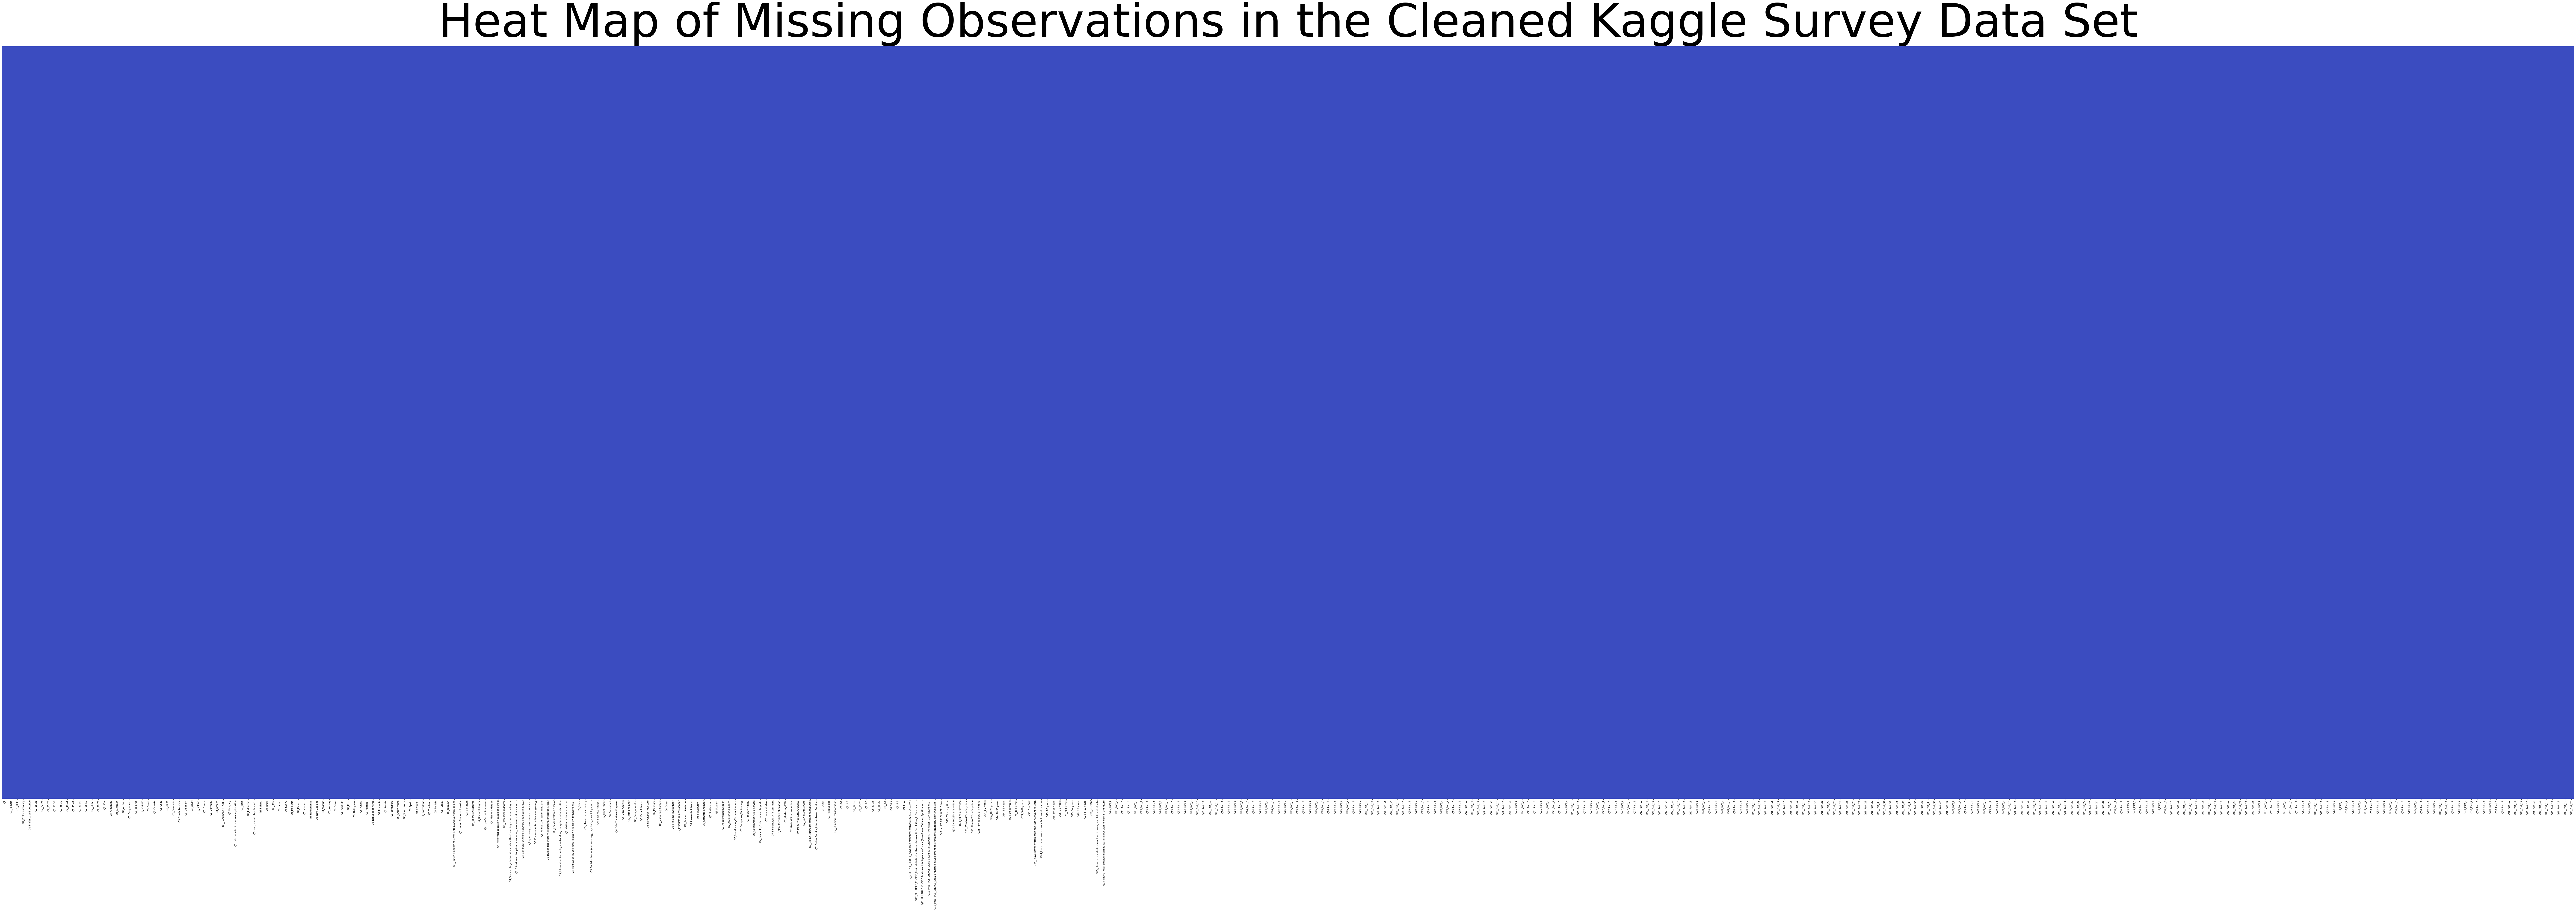

In [16]:
fig, ax = plt.subplots(figsize=(200,60))
sns.heatmap(kaggle_survey_cleaned.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)
plt.title('Heat Map of Missing Observations in the Cleaned Kaggle Survey Data Set', size=200)

# Part 1: Exploratory Data Analysis
a.Present 3 graphical figures that represent trends in the data. How could these trends be used to help  with  the  task  of  predicting yearly  compensation  or  understanding  the  data?  All  graphs should be readableand presented in the notebook. All axes must be appropriately labelled. 

b.Visualize the order of feature importance. Some possible methods include correlation plot, or a similar method. Given the data, which of the original attributes in the data are most related to a survey respondent’s yearly compensation? 

Text(0.5, 1.0, 'Age Groups with most number of respondants in the survey')

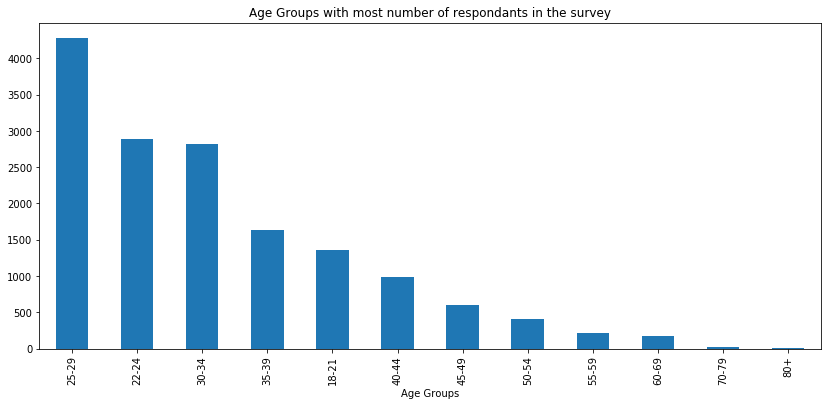

In [17]:
kaggle_survey_eda['Q2'].value_counts().plot(kind='bar',figsize=(14,6))
plt.xlabel('Age Groups')
plt.title('Age Groups with most number of respondants in the survey')

## Inference:
The graph obtained above shows the number of respondants in the survey falling into certain age group. It can be thus infered that the age groups 25-29 have responded in the survey. It can be an important feature in any survey as the trends are made as well as broken by the youngsters.

Text(0.5, 1.0, 'Countries with most number of respondants in the survey')

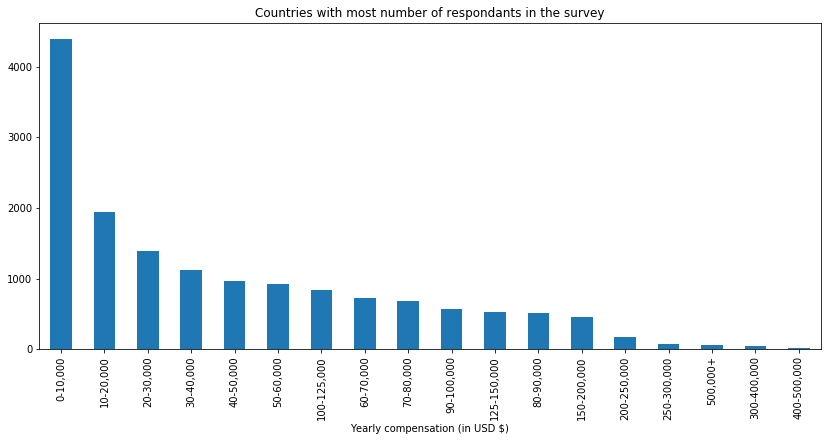

In [18]:
kaggle_survey_eda['Q9'].value_counts().plot(kind='bar',figsize=(14,6))
plt.xlabel('Yearly compensation (in USD $)')
plt.title('Countries with most number of respondants in the survey')

## Inference
The graph obtained above shows the yearly compensation bucket of the people that have responded for the survey. It can be seen that the bucket of 0-10,000 USD $ have the majority followed by 10-20,000 and 20-30,000.

Text(0.5, 1.0, 'Countries with most number of respondants in the survey')

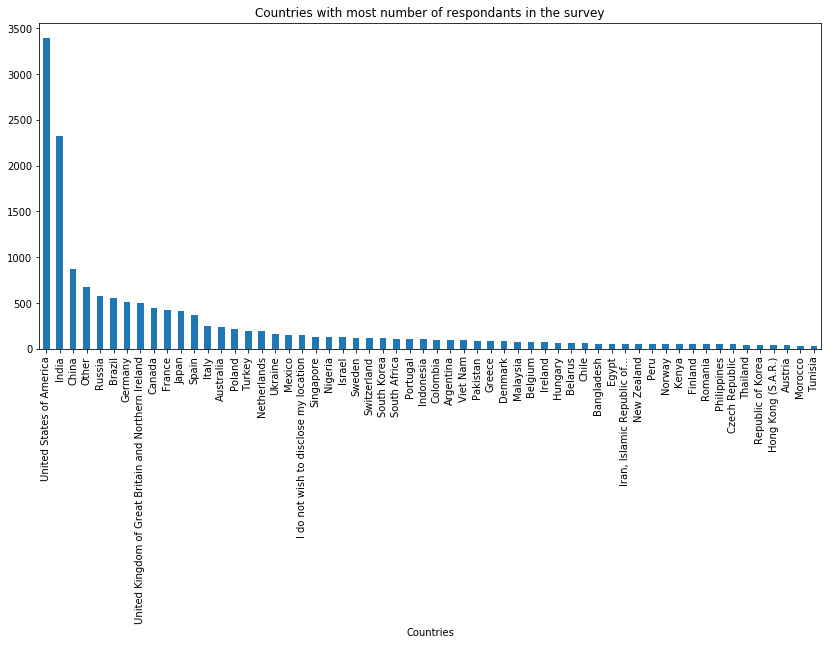

In [19]:
kaggle_survey_eda['Q3'].value_counts().plot(kind='bar',figsize=(14,6))
plt.xlabel('Countries')
plt.title('Countries with most number of respondants in the survey')

## Inference:
The graph above represents the number of respondants from different countries. As it can be seen countries like USA,India and China have the major contributions in the survey.


Text(0.5, 1.0, 'Genders with most number of respondants in the survey')

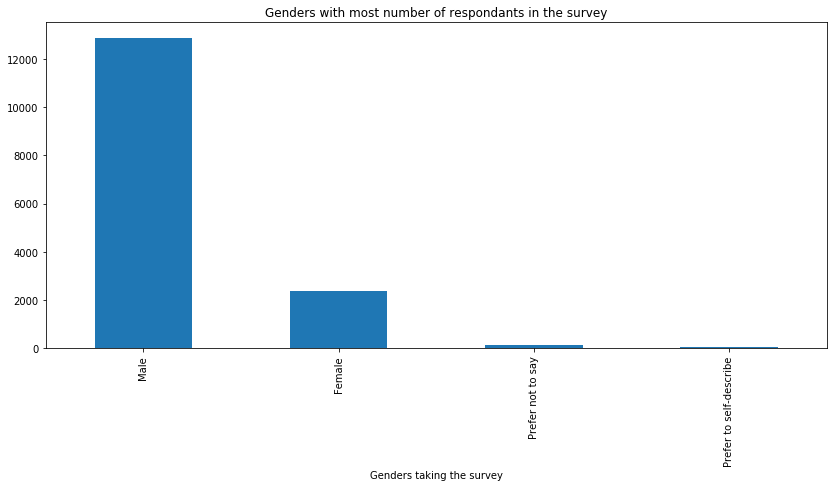

In [20]:
kaggle_survey_eda['Q1'].value_counts().plot(kind='bar',figsize=(14,6))
plt.xlabel('Genders taking the survey')
plt.title('Genders with most number of respondants in the survey')

## Inference
The graph above represents the genders that have responded in the survey. Males, have clearly dominated the survey response but yet, responses from females have to considered as a feature to avoid overfitting.

# Part 2: Feature Selections
Explain how feature engineering is a useful tool in machine learning. Then select the features to be used for analysis either manually or through some feature selection algorithm (e.g. regularized regression). Not all features need to be used; features can be removed or added as desired. If the resulting number of features is very high, dimensionality reduction can also be used (e.g. PCA). Use at least one feature selection technique –describe the technique and provide justificationon why you selected that set of features.

In [21]:
#Combining the salary and the dropdown questions into a new dataframe
kaggle_survey_cleaned2=pd.concat([salary,dropdown_questions_encoded], axis=1, sort=False)
kaggle_survey_cleaned2.head()

,Q9,Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,...,Q25_1-2 years,Q25_10-15 years,Q25_2-3 years,Q25_20+ years,Q25_3-4 years,Q25_4-5 years,Q25_5-10 years,Q25_< 1 year,Q25_I have never studied machine learning and I do not plan to,Q25_I have never studied machine learning but plan to learn in the future
0,"10-20,000",0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,"0-10,000",1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,"0-10,000",0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,"10-20,000",0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,"0-10,000",0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# Plot a correlation plot for the feature importance
corr = kaggle_survey_eda.corr()
corr.head()

,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20
Q11_Part_1,1.000000,0.212519,0.298066,0.232318,0.041591,0.163187,0.270109,0.043676,-0.016781,0.026463,...,0.009144,-0.000321,0.039769,0.134069,0.101661,0.060970,0.073510,0.094521,NaN,NaN
Q11_Part_2,0.212519,1.000000,0.220112,0.375868,0.199153,0.189268,0.067868,0.142994,0.047930,0.032641,...,0.146532,0.051396,0.092878,0.106615,0.064661,0.045341,0.037707,0.118273,NaN,NaN
Q11_Part_3,0.298066,0.220112,1.000000,0.181234,0.049064,0.106730,0.109884,0.082100,0.076022,0.041118,...,0.031112,0.002796,0.046819,0.077155,0.078893,0.043079,0.052336,0.069695,NaN,NaN
Q11_Part_4,0.232318,0.375868,0.181234,1.000000,0.283839,0.244259,0.100134,0.177530,0.094180,0.054795,...,0.239271,0.123195,0.100444,0.111524,0.089961,0.052314,0.057712,0.169375,NaN,NaN
Q11_Part_5,0.041591,0.199153,0.049064,0.283839,1.000000,0.118500,0.029288,0.112125,0.037319,0.020336,...,0.201256,0.164173,0.068024,0.052717,0.022016,-0.011050,-0.004880,0.060436,NaN,NaN


In [23]:
#kaggle_survey_cleaned2=kaggle_survey_cleaned2.astype(float) # This was converted to float as suggested by a previous error generated.

# Scales the data.
scaler=StandardScaler()
scaler.fit(kaggle_survey_cleaned2.drop('Q9',axis=1)) 
kaggle_survey_scaled=scaler.transform(kaggle_survey_cleaned2.drop('Q9',axis=1))

In [24]:
kaggle_survey_scaled.mean(axis=0)

array([-1.84209666e-18, -4.60524166e-17, -1.05920558e-17, -3.22366916e-18,
        3.68419333e-18, -9.39469299e-17, -5.20392308e-17, -3.86840299e-17,
       -2.02630633e-17, -4.37497958e-17, -6.07891899e-17,  0.00000000e+00,
       -5.52628999e-18, -2.76314500e-18,  1.47367733e-17,  1.38157250e-18,
       -1.47367733e-17,  2.67104016e-17,  4.60524166e-18, -6.90786249e-18,
       -3.31577400e-17, -4.37497958e-17,  3.86840299e-17,  3.13156433e-17,
        2.02630633e-17,  2.94735466e-17,  3.03945950e-17,  3.49998366e-17,
       -2.76314500e-18, -1.10525800e-17,  1.24341525e-17, -3.13156433e-17,
        4.32892716e-17, -9.21048332e-18, -3.31577400e-17,  1.65788700e-17,
       -3.68419333e-18, -1.63946603e-16,  1.10525800e-17, -2.76314500e-18,
       -1.47367733e-17,  4.51313683e-17, -4.55918924e-17,  2.57893533e-17,
       -1.84209666e-18, -5.52628999e-18,  1.84209666e-18, -1.28946766e-17,
        1.47367733e-17, -1.74999183e-17, -3.68419333e-18, -4.60524166e-18,
       -2.39472566e-17, -

In [25]:
kaggle_survey_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

# Part 3: Implementation of the Model

In [26]:
# Separating the dataset into training and testing
X=kaggle_survey_cleaned2.drop(['Q9'],axis=1)
y=kaggle_survey_cleaned2['Q9']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
#scaling the values before fitting the model
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
#Fitting the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()    
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
predictions = model.predict(X_test)
    
ACC = accuracy_score(predictions,y_test)

print(ACC)


0.35039965435299203


In [32]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    ACC = accuracy_score(predictions,y_test)
    np_idx += 1
    
    print (ACC)
   

print ("Average Score: {}%({}%)".format(round(np.mean(ACC),3),round(np.std(ACC),3)))

0.4419961114711601
0.3013609850939728
0.3013609850939728
0.38237200259235254
0.3596889176928062
0.3039533376539209
0.339598185353208
0.36357744653272844
0.4102397926117952
0.4364461738002594
Average Score: 0.436%(0.0%)


In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

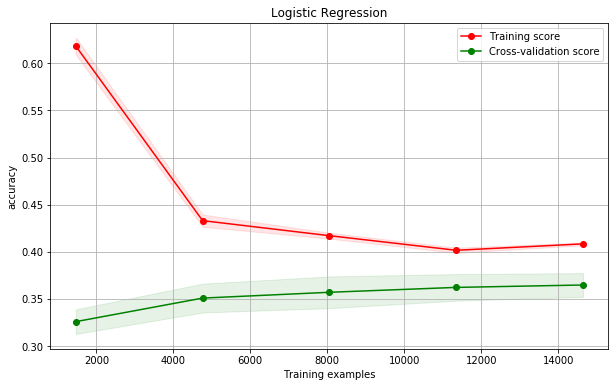

In [34]:
from sklearn.model_selection import learning_curve
plot_learning_curve(model,'Logistic Regression', X, y, cv=20)

# Part 4 : Hyperparameter Tuning
Grid search is a way of selecting the hyperparameters that model the accuracy of the model 
Grid search just builds several models with all the parameter combinations specified, and runs cross validation to return the set of parameters that had the highest cv score on the validation set.

While performing the Grid Search the predicted values for the C was 100 and the solver chosen was Newton-cg, hence the model was again solved giving only those parameters.

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model.fit(X_train, y_train)

            predictions = model.predict(X_test)

            ACC=predictions(predictions,y_test)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 100, 'solver': 'newton-cg'}
Best Score: 40.85%(5.954%)

The optimal log model uses C=100, and a newton-cg solver, and has a cross validation score of 42.35% with a standard deviation of 1.954%

In [35]:
model = LogisticRegression(C=100,solver='newton-cg')
scaler = StandardScaler()


model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [36]:
ACC = accuracy_score(predictions,y_test)

print((ACC*100))

43.45006485084306


After performing the Grid Search, the accuracy of the model was improved to 43.45% which is still higher than the one previously achieved i.e., 35.0%

# Part 5: Testing and Discussion

In [37]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    0-10,000       0.88      0.64      0.74       857
   10-20,000       0.23      0.25      0.24       209
 100-125,000       0.03      0.04      0.03        26
 125-150,000       0.00      0.00      0.00         4
 150-200,000       0.05      0.17      0.08         6
   20-30,000       0.11      0.21      0.15        76
 200-250,000       0.00      0.00      0.00         3
 250-300,000       0.00      0.00      0.00         1
   30-40,000       0.07      0.11      0.09        72
 300-400,000       0.00      0.00      0.00         3
   40-50,000       0.19      0.15      0.17       113
 400-500,000       0.00      0.00      0.00         6
   50-60,000       0.21      0.20      0.20        82
    500,000+       0.00      0.00      0.00        11
   60-70,000       0.08      0.12      0.10        43
   70-80,000       0.03      0.12      0.04         8
   80-90,000       0.00      0.00      0.00         7
  90-100,000       0.03    